In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
print('Working directory:', os.getcwd())
path = os.path.abspath('../data/raw/BMMS_overview.xlsx')
print('Absolute path being used:', path)
print('Exists?', os.path.exists(path))

Working directory: C:\Users\audiv\PycharmProjects\AdvancedSimulation\EPA133a-G04-A3\data
Absolute path being used: C:\Users\audiv\PycharmProjects\AdvancedSimulation\EPA133a-G04-A3\data\raw\BMMS_overview.xlsx
Exists? True


In [3]:
bridges = pd.read_excel('../data/raw/BMMS_overview.xlsx')
roads = pd.read_csv('../data/raw/_roads3.csv')

In [4]:
# check shape of dataframes
print(bridges.shape)
print(roads.shape)

(20415, 20)
(51348, 8)


In [5]:
# filter only for N1,N2, and the side roads (N1xx, N2xx)
roads = roads[roads['road'].str.match(r'^(N1|N2)\d*$', na=False)]
bridges = bridges[bridges['road'].str.match(r'^(N1|N2)\d*$', na=False)]

In [6]:
# approx intersections by detecting repeated chainage values
roads['is_intersection'] = roads.duplicated(subset=['chainage'], keep=False)

In [7]:
# Mark intersections as a separate type
roads.loc[roads['is_intersection'], 'model_type'] = 'intersection'

In [8]:
# save the filtered roads and bridges for further processing
roads.to_csv('../data/roads_n1_n2_filtered.csv', index=False)
bridges.to_csv('../data/bridges_n1_n2_filtered.csv', index=False)

In [9]:
# standardize bridge names (lowercase, remove spaces, hyphens, and special characters)

#bridges['name_clean'] = bridges['name'].str.lower().str.replace(' ', '').str.replace('-', '').str.replace(',', '').str.replace('.', '')
#bridges.loc[bridges['name_clean'] == '.', 'name_clean'] = 'unknown'

# Remove duplicates from bridges based on both 'road_lrp' and 'chainage'

#bridges['road_lrp'] = bridges['road'] + bridges['chainage'].astype(str)
#bridges = bridges.drop_duplicates(subset=['road_lrp', 'chainage'], keep='first')

# Remove duplicate roads based on 'road_lrp' to avoid redundancy

# roads['road_lrp'] = roads['road'] + roads['lrp'].astype(str)
# roads = roads.drop_duplicates(subset=['road_lrp'], keep='first')

In [10]:
roads_filtered = pd.read_csv("../data/roads_n1_n2_filtered.csv")

print(roads_filtered.head())

  road  chainage     lrp        lat        lon  gap       type  \
0   N1     0.000    LRPS  23.706028  90.443333  NaN     Others   
1   N1     0.814   LRPSa  23.702917  90.450417  NaN    Culvert   
2   N1     0.822   LRPSb  23.702778  90.450472  NaN  CrossRoad   
3   N1     1.000  LRP001  23.702139  90.451972  NaN     KmPost   
4   N1     2.000  LRP002  23.697889  90.460583  NaN     KmPost   

                                                name  is_intersection  \
0  Start of Road  after Jatrabari Flyover infront...             True   
1                                        Box Culvert            False   
2                            Intersection with Z1101             True   
3                                    Km post missing             True   
4                                    Km post missing             True   

     model_type  
0  intersection  
1           NaN  
2  intersection  
3  intersection  
4  intersection  


In [11]:
bridges_filtered = pd.read_csv("../data/bridges_n1_n2_filtered.csv")

print(bridges_filtered.head())

  road      km              type  LRPName               name  length  \
0   N1   1.800       Box Culvert  LRP001a                  .   11.30   
1   N1   4.925       Box Culvert  LRP004b                  .    6.60   
2   N1   8.976  PC Girder Bridge  LRP008b  Kanch pur Bridge.  394.23   
3   N1  10.880       Box Culvert  LRP010b   NOYAPARA CULVERT    6.30   
4   N1  10.897       Box Culvert  LRP010c     ADUPUR CULVERT    6.30   

  condition  structureNr                                           roadName  \
0         A       117861  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   
1         A       117862  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   
2         A       119889  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   
3         A       112531  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   
4         A       112532  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   

   chainage  width  constructionYear  spans   zone circle     division  \
0     1.800   19.5

In [12]:
# Assuming you've already saved your filtered data:
roads = pd.read_csv("../data/roads_n1_n2_filtered.csv")    # e.g. columns: [road, chainage, lat, lon, type, name, is_intersection, ...]
bridges = pd.read_csv("../data/bridges_n1_n2_filtered.csv") # e.g. columns: [road, km (chainage), lat, lon, type, name, condition, length, ...]

In [13]:
# 2.1 Rename chainage column if needed
# roads may already have a 'chainage' column, so no change is required.
# If your chainage column is named differently (e.g. "km"), rename it:
# roads.rename(columns={'km': 'chainage'}, inplace=True)

# 2.2 Create a new DataFrame with the columns you need
roads_df = pd.DataFrame()
roads_df['road'] = roads['road']
roads_df['chainage'] = roads['chainage']
roads_df['lat'] = roads['lat']
roads_df['lon'] = roads['lon']
roads_df['name'] = roads['name']

# We'll set 'condition' to NaN for roads (since it usually applies to bridges)
roads_df['condition'] = np.nan

# We'll leave 'length' at 0 or NaN for now—unless you have a specific way
# to calculate length for road segments:
roads_df['length'] = 0

# 2.3 Determine model_type for roads
#    - If is_intersection == True, then 'intersection'
#    - Otherwise, default to 'link'
roads_df['model_type'] = np.where(
    roads['is_intersection'] == True,
    'intersection',
    'link'
)


In [14]:
bridges_df = pd.DataFrame()
bridges_df['road'] = bridges['road']

# If your bridges have a column called 'km' for chainage, rename it:
# bridges.rename(columns={'km': 'chainage'}, inplace=True)
bridges_df['chainage'] = bridges['chainage']  # or 'chainage' if already named that

bridges_df['lat'] = bridges['lat']
bridges_df['lon'] = bridges['lon']
bridges_df['name'] = bridges['name']
bridges_df['condition'] = bridges['condition']
bridges_df['length'] = bridges['length']  # from the bridges data
bridges_df['model_type'] = 'bridge'


In [15]:
df_combined = pd.concat([roads_df, bridges_df], ignore_index=True)


In [16]:
def label_sourcesink(group):
    min_chain = group['chainage'].min()
    max_chain = group['chainage'].max()

    # Mark rows that match min or max chainage
    mask_min = (group['chainage'] == min_chain)
    mask_max = (group['chainage'] == max_chain)

    group.loc[mask_min, 'model_type'] = 'sourcesink'
    group.loc[mask_max, 'model_type'] = 'sourcesink'

    return group

df_combined = df_combined.groupby('road', group_keys=False).apply(label_sourcesink)


In [17]:
df_combined = df_combined.sort_values(by=['road', 'chainage']).reset_index(drop=True)


In [18]:
start_id = 1000000
df_combined['id'] = range(start_id, start_id + len(df_combined))


In [19]:
# 2. For each road, shift the chainage and compute the difference
df_combined['prev_chainage'] = df_combined.groupby('road')['chainage'].shift(1)

# 3. Calculate segment length as chainage - prev_chainage
df_combined['length'] = df_combined['chainage'] - df_combined['prev_chainage']

# 4. For the first row of each road (where prev_chainage is NaN), fill with 0
df_combined['length'] = df_combined['length'].fillna(0)

# 5. Drop the helper column if you like
df_combined.drop(columns=['prev_chainage'], inplace=True)

# Now df_combined['length'] contains the segment length in the same unit as chainage.

In [20]:
df_combined = df_combined[[
    'road',
    'id',
    'model_type',
    'condition',
    'name',
    'lat',
    'lon',
    'length'
]]


In [21]:
display(df_combined.head(40))
df_combined.to_csv("../data/combined_n1_n2.csv", index=False)


,road,id,model_type,condition,name,lat,lon,length
0,N1,1000000,sourcesink,NaN,Start of Road after Jatrabari Flyover infront...,23.706028,90.443333,0.000
1,N1,1000001,link,NaN,Box Culvert,23.702917,90.450417,0.814
2,N1,1000002,intersection,NaN,Intersection with Z1101,23.702778,90.450472,0.008
3,N1,1000003,intersection,NaN,Km post missing,23.702139,90.451972,0.178
4,N1,1000004,bridge,A,.,23.698739,90.458861,0.800
5,N1,1000005,intersection,NaN,Km post missing,23.697889,90.460583,0.200
6,N1,1000006,link,NaN,Box culvert,23.697361,90.461667,0.130
7,N1,1000007,intersection,NaN,Km post missing,23.693833,90.469138,0.870
8,N1,1000008,intersection,NaN,Km post missing,23.693611,90.478777,1.000
9,N1,1000009,link,NaN,Road to Narayanganj(R111),23.693805,90.480527,0.175


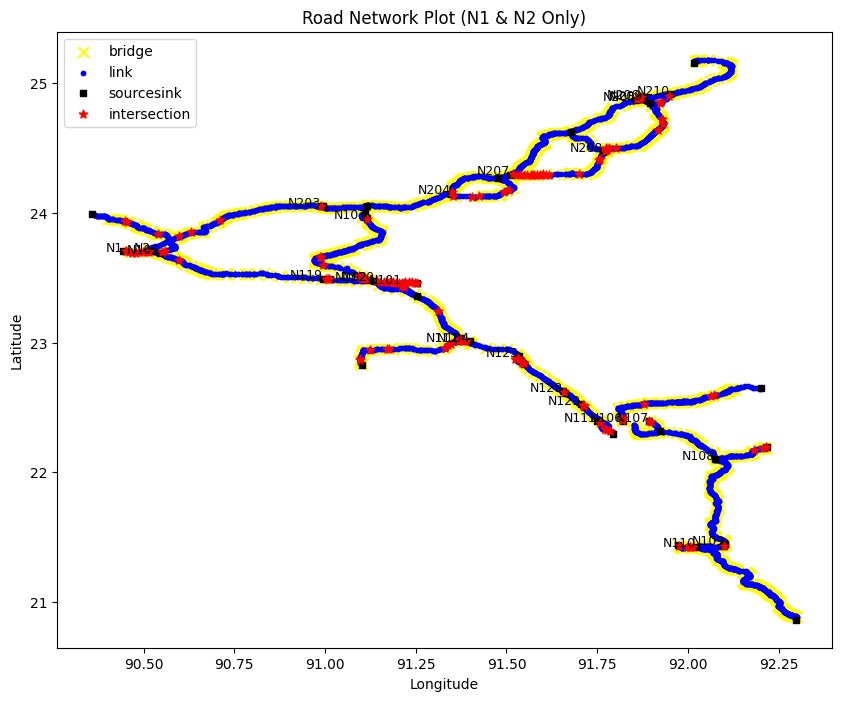

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df_combined = pd.read_csv("../data/combined_n1_n2.csv")

colors = {
    'bridge': 'yellow',
    'link': 'blue',
    'sourcesink': 'black',
    'intersection': 'red'
}

markers = {
    'bridge': 'x',
    'link': 'o',
    'sourcesink': 's',
    'intersection': '*'
}

marker_sizes = {
    'bridge': 60,
    'link': 10,
    'sourcesink': 20,
    'intersection': 40
}

plt.figure(figsize=(10, 8))

for model_type, color in colors.items():
    subset = df_combined[df_combined['model_type'] == model_type]
    plt.scatter(subset['lon'], subset['lat'], c=color, label=model_type, s=marker_sizes[model_type],
                marker=markers[model_type])

for road in df_combined['road'].unique():
    first_point = df_combined[df_combined['road'] == road].iloc[0]
    plt.text(first_point['lon'], first_point['lat'], road, fontsize=9, ha='right')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Road Network Plot (N1 & N2 Only)')
plt.legend()
plt.show()